# Kombinált technikák használata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../_data/DataSet_Hitelbiralat_OnlyNum.csv")

In [3]:
len(df)

50000

In [4]:
target = "Age"

In [5]:
target

'Age'

<Axes: >

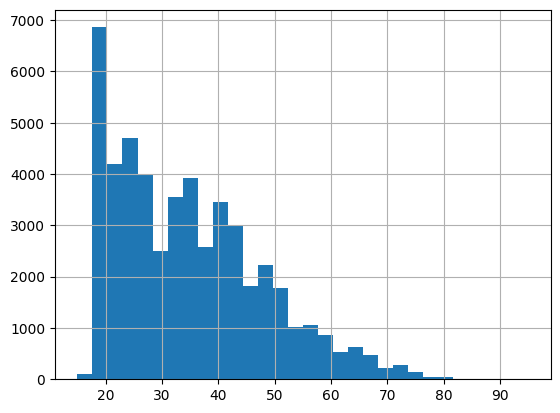

In [6]:
df[target].hist(bins=30)

In [7]:
bemeno_valtozo=list(df.columns)[1:-1]

In [8]:
bemeno_valtozo.remove(target)

In [9]:
train_df=df.iloc[:25000,:].copy()
test_df =df.iloc[25000:,:].copy()

In [10]:
def tanit_testel(model,train_df,test_df):
    model.fit(train_df[bemeno_valtozo],train_df[target])
    pred=model.predict(test_df[bemeno_valtozo])
    test_df['pred']=pred
    mae = np.mean(  abs(pred-test_df[target])  )
    rmse= np.sqrt( np.mean(  (pred-test_df[target])**2 ))
    return mae, rmse, test_df

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linreg = LinearRegression()

In [13]:
a,b,c=tanit_testel(linreg,train_df,test_df)
res = pd.DataFrame({'name':['linreg'],'mae':[a],'rmse':[b]})
res

,name,mae,rmse
0,linreg,8.750544,11.080877


In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt4 = DecisionTreeRegressor(max_depth=4,
                            max_leaf_nodes=100,random_state=42)

In [16]:
a,b,c=tanit_testel(dt4,train_df,test_df)
res2 = pd.DataFrame({'name':['dt4'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410


In [17]:
dt14 = DecisionTreeRegressor(max_depth=14,
                            max_leaf_nodes=20,random_state=42)

In [18]:
a,b,c=tanit_testel(dt14,train_df,test_df)
res2 = pd.DataFrame({'name':['dt14'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
rf = RandomForestRegressor(random_state=42,
                          n_estimators=100,
                          max_depth=4,
                          max_leaf_nodes=100)

In [21]:
a,b,c=tanit_testel(rf,train_df,test_df)
res2 = pd.DataFrame({'name':['rf4'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242


In [22]:
rf2 = RandomForestRegressor(random_state=42,
                          n_estimators=100,
                          max_depth=14,
                          max_leaf_nodes=20)

In [23]:
a,b,c=tanit_testel(rf2,train_df,test_df)
res2 = pd.DataFrame({'name':['rf14'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328


In [24]:
rf2 = RandomForestRegressor(random_state=42,
                          n_estimators=500,
                          max_depth=10,
                          max_leaf_nodes=20)

In [25]:
a,b,c=tanit_testel(rf2,train_df,test_df)
res2 = pd.DataFrame({'name':['rf10-500'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839


In [26]:
rf = RandomForestRegressor(random_state=42,
                          n_estimators=1,
                          max_depth=4,
                          max_leaf_nodes=10,
                          warm_start=True)
x_t=[]
y_t=[]
y_t2=[]
for i in range(40):
    rf.n_estimators=rf.n_estimators+3
    #print("Fak szama:",rf.n_estimators)
    x_t.append(rf.n_estimators)
    a,b,c=tanit_testel(rf,train_df,test_df)
    y_t.append(a)
    y_t2.append(b)
    

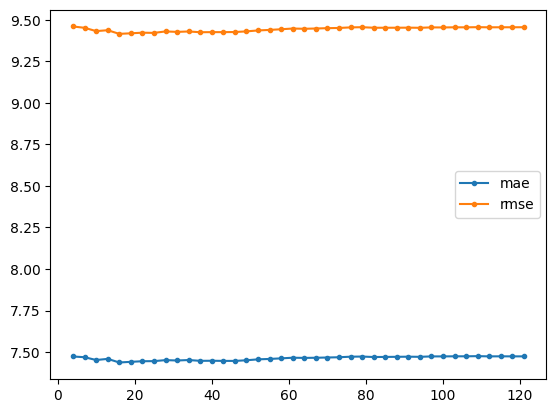

In [27]:
plt.plot(x_t,y_t,marker='.',label='mae')
plt.plot(x_t,y_t2,marker='.',label='rmse')
plt.legend()


In [28]:
gbm=GradientBoostingRegressor(random_state=42,
                             n_estimators=100,
                             max_depth=4,
                             max_leaf_nodes=10,
                             learning_rate=1.0)

In [29]:
a,b,c=tanit_testel(gbm,train_df,test_df)
res2 = pd.DataFrame({'name':['boG-BoostingM'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839
0,boG-BoostingM,6.436319,8.494862


In [30]:
gbm=GradientBoostingRegressor(random_state=42,
                             n_estimators=500,
                             max_depth=8,
                             max_leaf_nodes=10,
                             learning_rate=1.0)

In [31]:
a,b,c=tanit_testel(gbm,train_df,test_df)
res2 = pd.DataFrame({'name':['boG-BoostingM8_500'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839
0,boG-BoostingM,6.436319,8.494862
0,boG-BoostingM8_500,7.306529,9.855139


In [32]:
gbm=GradientBoostingRegressor(random_state=42,
                             n_estimators=500,
                             max_depth=8,
                             max_leaf_nodes=10,
                             learning_rate=0.1)

In [33]:
a,b,c=tanit_testel(gbm,train_df,test_df)
res2 = pd.DataFrame({'name':['boG-BoostingM8_500_lr01'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839
0,boG-BoostingM,6.436319,8.494862
0,boG-BoostingM8_500,7.306529,9.855139
0,boG-BoostingM8_500_lr01,6.132313,8.053133


In [34]:
from sklearn.neural_network import MLPRegressor

In [35]:
nn = MLPRegressor(random_state=42,
                  hidden_layer_sizes=(2,)
                 )

In [36]:
a,b,c=tanit_testel(nn,train_df,test_df)
res2 = pd.DataFrame({'name':['nn-(2)'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839
0,boG-BoostingM,6.436319,8.494862
0,boG-BoostingM8_500,7.306529,9.855139
0,boG-BoostingM8_500_lr01,6.132313,8.053133
0,nn-(2),15.344936,19.976935


In [37]:
nn = MLPRegressor(random_state=42,
                  hidden_layer_sizes=(5,3),
                  learning_rate='adaptive',
                                        activation='tanh',
                                        solver='lbfgs',
                  max_iter=2000,
                 )

In [38]:
a,b,c=tanit_testel(nn,train_df,test_df)
res2 = pd.DataFrame({'name':['nn-(extra)'],'mae':[a],'rmse':[b]})
res=pd.concat([res,res2])
res

,name,mae,rmse
0,linreg,8.750544,11.080877
0,dt4,7.537058,9.529410
0,dt14,6.907857,8.974076
0,rf4,7.430403,9.407242
0,rf14,6.818901,8.845328
0,rf10-500,6.816734,8.845839
0,boG-BoostingM,6.436319,8.494862
0,boG-BoostingM8_500,7.306529,9.855139
0,boG-BoostingM8_500_lr01,6.132313,8.053133
0,nn-(2),15.344936,19.976935


In [39]:
for i in range(2,11):
    nn = MLPRegressor(random_state=42,
                      hidden_layer_sizes=(i,3),
                      max_iter=1000,
                     )
    a,b,c=tanit_testel(nn,train_df,test_df)
    print(i,"->",a,b)

2 -> 12.029476724914108 15.266406831151084
3 -> 10.787338917952951 14.329625788491517
4 -> 8.813435542031037 11.171213658960962
5 -> 9.705195412388884 12.52712355906489
6 -> 35.20098933584557 37.89057921674004
7 -> 9.938401719955522 12.726827633016887
8 -> 9.390636819206938 12.044809733044278
9 -> 11.19388778298907 15.104158530445588
10 -> 8.901778402168466 11.66641098328666
